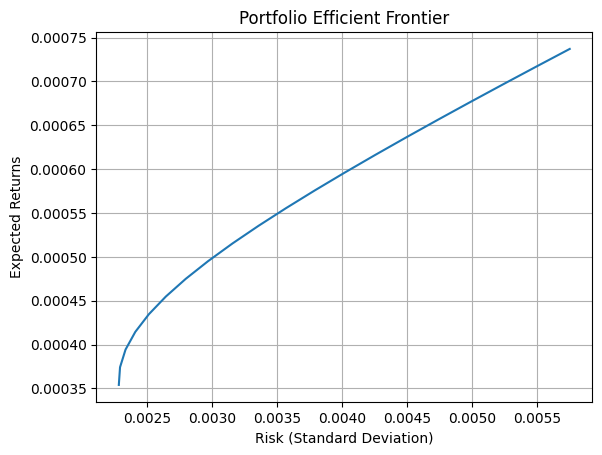

In [55]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end dates
end = datetime(2013, 4, 16)
start = end - timedelta(days=300)

# List of tickers
tickers = ['DIA', 'IYT', 'IDU', 'QQXT', 'FEZ', 'TLT', 'HYG']

# Dictionary to store the dataframes
data = {}

# Loop through the tickers to download data and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end, progress=False)
    df['Daily Return'] = df['Adj Close'].pct_change()
    data[ticker] = df['Daily Return']

# Combine all daily returns into a single DataFrame and drop NaN values
returns_data = pd.DataFrame(data).dropna()

# Calculate the mean returns
returns_mean = returns_data.mean()
r_hat = returns_mean.to_numpy().reshape(-1, 1)  # Reshape to a column vector

# Calculate the covariance matrix
cov_matrix = returns_data.cov()
Sigma = cov_matrix.to_numpy()

# Define the variable
x = cp.Variable((len(tickers), 1))

# Array of target portfolio returns (expected returns)
muArray = np.linspace(3.54, 7.37, 20) * 10**-4

# List to store the risks (standard deviations)
risks = []
allocation = []

for mu in muArray:
    # Define the problem
    prob = cp.Problem(
        cp.Minimize(cp.quad_form(x, Sigma)),  # Minimize the portfolio variance
        [
            r_hat.T @ x >= mu,                # Return constraint
            np.ones((1, len(tickers))) @ x == 1,  # Weight sum constraint
            x >= 1e-8                            # Non-negativity constraint
        ]
    )

    # Solve the problem
    prob.solve(solver=cp.SCS, eps=1e-8)
    
    # Append the standard deviation (risk) to the list
    risks.append(np.sqrt(prob.value))  # Square root of the minimized variance
    allocation.append(x.value)

# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()


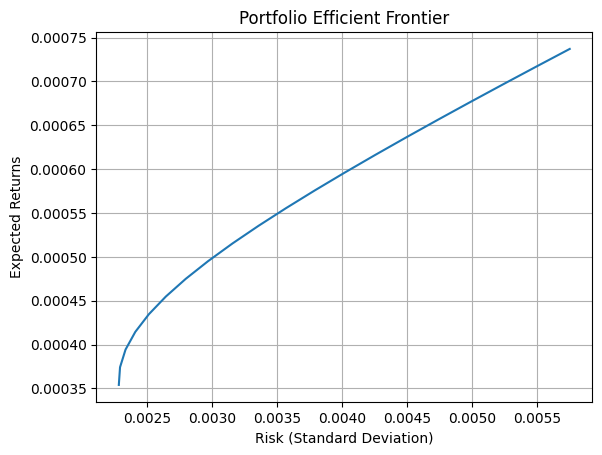

[[4.46358404e-02]
 [1.62376631e-01]
 [1.74107508e-01]
 [1.88995159e-10]
 [1.88800212e-02]
 [3.00000000e-01]
 [3.00000000e-01]]


In [57]:
import yfinance as yf
import cvxpy as cp
import numpy as np

# List of tickers
#tickers = ['DIA', 'IYT', 'IDU', 'QQXT', 'FEZ', 'TLT', 'HYG']
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'PG']


# Combine all daily returns into a single DataFrame and drop NaN values
returns_data = pd.DataFrame(data).dropna()

# Calculate the mean returns
returns_mean = returns_data.mean()
r_hat = returns_mean.to_numpy().reshape(-1, 1)  # Reshape to a column vector

# Calculate the covariance matrix
cov_matrix = returns_data.cov()
Sigma = cov_matrix.to_numpy()

# Desired sector allocation constraint (max 30% in any one sector)
max_sector_allocation = 0.30

# Get sector information for each stock
sectors = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    sectors[ticker] = info.get('sector', 'Unknown')


# Define the variable for portfolio weights
x = cp.Variable((len(tickers), 1))

# Define the sector constraints
sector_constraints = []
sector_groups = {}

# Group tickers by sector
for ticker, sector in sectors.items():
    if sector not in sector_groups:
        sector_groups[sector] = []
    sector_groups[sector].append(ticker)

# Create a constraint for each sector
for sector, sector_tickers in sector_groups.items():
    sector_indices = [tickers.index(ticker) for ticker in sector_tickers]
    sector_weight_sum = cp.sum(x[sector_indices])
    sector_constraints.append(sector_weight_sum <= max_sector_allocation)

# Add sector constraints to your optimization problem
# In addition to the return, sum, and non-negativity constraints

# Example optimization problem
prob = cp.Problem(
    cp.Minimize(cp.quad_form(x, Sigma)),  # Minimize portfolio variance
    [
        r_hat.T @ x >= mu,                # Return constraint
        np.ones((1, len(tickers))) @ x == 1,  # Weight sum constraint
        x >= 0                           # Non-negativity constraint
    ] + sector_constraints  # Add sector-specific constraints
)

# Solve the problem
prob.solve(solver=cp.SCS, eps=1e-8)


# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()

print(x.value)

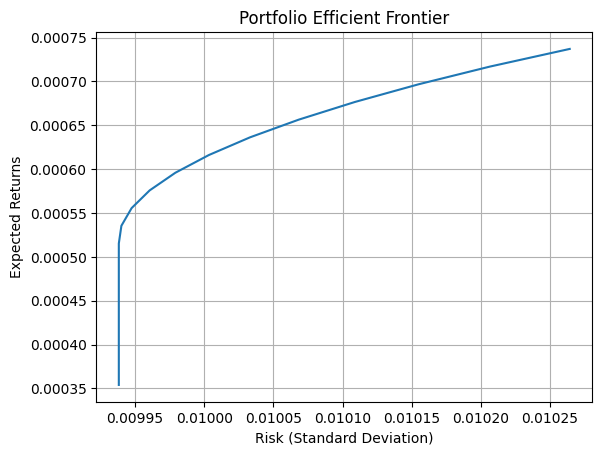

Optimal portfolio weights:
 [[1.00013185e-08]
 [6.51438331e-02]
 [9.51819259e-09]
 [1.74751016e-02]
 [8.92829424e-09]
 [3.32346920e-01]
 [5.85034117e-01]]


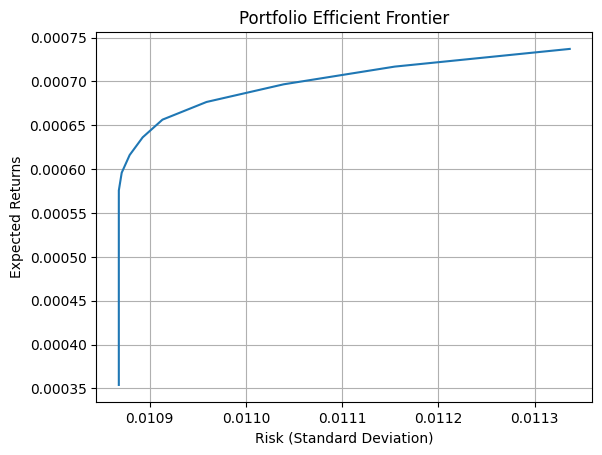

[[1.96397108e-01]
 [1.03602889e-01]
 [7.80149833e-10]
 [2.11991768e-02]
 [7.88008381e-02]
 [2.99999988e-01]
 [2.99999998e-01]]


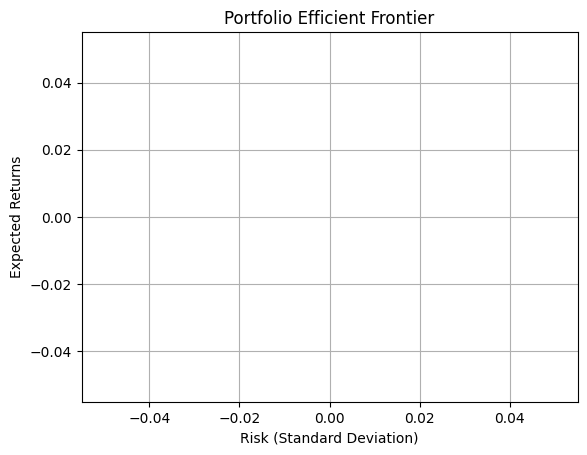

None


In [79]:
import yfinance as yf
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates for downloading data
end = datetime(2023, 10, 1)
start = end - timedelta(days=365 * 2)  # 2 years of historical data

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'PG']

# Dictionary to store the dataframes
data = {}

# Loop through the tickers to download data and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end, progress=False)
    df['Daily Return'] = df['Adj Close'].pct_change()
    data[ticker] = df['Daily Return']

# Combine all daily returns into a single DataFrame and drop NaN values
returns_data = pd.DataFrame(data).dropna()

# Calculate the mean returns
returns_mean = returns_data.mean()
r_hat = returns_mean.to_numpy().reshape(-1, 1)  # Reshape to a column vector

# Calculate the covariance matrix
cov_matrix = returns_data.cov()
Sigma = cov_matrix.to_numpy()


# Define the variable for portfolio weights
x = cp.Variable((len(tickers), 1))

# Array of target portfolio returns (expected returns)
muArray = np.linspace(3.54, 7.37, 20) * 10**-4

# List to store the risks (standard deviations)
risks = []
allocation = []

for mu in muArray:
    # Define the problem
    prob = cp.Problem(
        cp.Minimize(cp.quad_form(x, Sigma)),  # Minimize the portfolio variance
        [
            r_hat.T @ x >= mu,                # Return constraint
            np.ones((1, len(tickers))) @ x == 1,  # Weight sum constraint
            x >= 1e-8                            # Non-negativity constraint
        ]
    )

    # Solve the problem
    prob.solve(solver=cp.SCS, eps=1e-8)
    
    # Append the standard deviation (risk) to the list
    risks.append(np.sqrt(prob.value))  # Square root of the minimized variance
    allocation.append(x.value)

# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()

# Output the optimal weights
print("Optimal portfolio weights:\n", x.value)

print("=======================================================")
# Desired sector allocation constraint (max 30% in any one sector)
max_sector_allocation = 0.30

# Get sector information for each stock
sectors = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    sectors[ticker] = info.get('sector', 'Unknown')

# Define the sector constraints
sector_constraints = []
sector_groups = {}

# Group tickers by sector
for ticker, sector in sectors.items():
    if sector not in sector_groups:
        sector_groups[sector] = []
    sector_groups[sector].append(ticker)

# Create a constraint for each sector
for sector, sector_tickers in sector_groups.items():
    sector_indices = [tickers.index(ticker) for ticker in sector_tickers]
    sector_weight_sum = cp.sum(x[sector_indices])
    sector_constraints.append(sector_weight_sum <= max_sector_allocation)

# List to store the risks (standard deviations)
risks = []
allocation = []

for mu in muArray:
    # Example optimization problem
    prob = cp.Problem(
        cp.Minimize(cp.quad_form(x, Sigma)),  # Minimize portfolio variance
        [
            r_hat.T @ x >= mu,                # Return constraint
            np.ones((1, len(tickers))) @ x == 1,  # Weight sum constraint
            x >= 0                           # Non-negativity constraint
        ] + sector_constraints  # Add sector-specific constraints
    )

    # Solve the problem
    prob.solve(solver=cp.SCS, eps=1e-8)
    # Append the standard deviation (risk) to the list
    risks.append(np.sqrt(prob.value))  # Square root of the minimized variance
    allocation.append(x.value)


# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()

print(x.value)

print("=====================================================================")
# Diversification constraint: no group of k largest asset allocations should exceed eta of total investment
k = 3  # Top 3 largest allocations
eta = 0.25  # No more than 25% of total portfolio in top 3 assets

# Auxiliary variables for the diversification constraint
t = cp.Variable()  # Scalar for the diversification constraint
s = cp.Variable((len(tickers), 1), nonneg=True)  # Slack variable

# Diversification constraint
diversification_constraint = [
    k * t + cp.sum(s) <= eta * cp.sum(x),  # kt + sum(s) <= eta * total investment
    s >= x - t * np.ones((len(tickers), 1)),  # s >= x - t
    s >= 0  # Ensure non-negative slack
]

# Target portfolio return (example, can be part of a loop for efficient frontier)
# Array of target portfolio returns (expected returns)

# Example optimization problem (minimizing portfolio variance)

# List to store the risks (standard deviations)
risks = []
allocation = []

for mu in muArray:
    # Define the problem for each mu
    prob = cp.Problem(
        cp.Minimize(cp.quad_form(x, Sigma)),
        [
            r_hat.T @ x >= mu,
            cp.sum(x) == 1,
            x >= 0
        ] +  diversification_constraint
    )
    prob.solve(solver=cp.SCS, eps=1e-8)
    risks.append(np.sqrt(prob.value))  # Calculate standard deviation (risk)
    allocation.append(x.value)

# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()

print(x.value)

#sector_constraints +

In [78]:
np.sum(x.value)

np.float64(0.9999999999914817)

In [29]:
len(tickers)

7

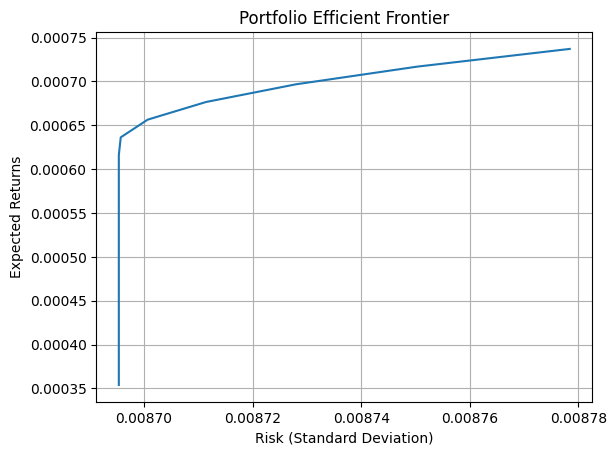

[[0.108623  ]
 [0.16666667]
 [0.16666667]
 [0.05804366]
 [0.16666667]
 [0.16666667]
 [0.16666667]]


In [6]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end dates
end = datetime(2013, 4, 16)
start = end - timedelta(days=300)

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'PG']

# Dictionary to store the dataframes
data = {}

# Loop through the tickers to download data and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end, progress=False)
    df['Daily Return'] = df['Adj Close'].pct_change()
    data[ticker] = df['Daily Return']

# Combine all daily returns into a single DataFrame and drop NaN values
returns_data = pd.DataFrame(data).dropna()

# Calculate the mean returns
returns_mean = returns_data.mean()
r_hat = returns_mean.to_numpy().reshape(-1, 1)  # Reshape to a column vector

# Calculate the covariance matrix
cov_matrix = returns_data.cov()
Sigma = cov_matrix.to_numpy()

# Define the variable
x = cp.Variable((len(tickers), 1))

# Array of target portfolio returns (expected returns)
muArray = np.linspace(3.54, 7.37, 20) * 10**-4

# List to store the risks (standard deviations)
risks = []
allocation = []

# Diversification constraint: no group of k largest asset allocations should exceed eta of total investment
k = 3  # Top 3 largest allocations
eta = 0.5  # No more than 25% of total portfolio in top 3 assets

# Auxiliary variables for the diversification constraint
t = cp.Variable()  # Scalar for the diversification constraint
s = cp.Variable((len(tickers), 1), nonneg=True)  # Slack variable

# Diversification constraint
diversification_constraint = [
    k * t + cp.sum(s) <= eta * cp.sum(x),  # kt + sum(s) <= eta * total investment
    s >= x - t * np.ones((len(tickers), 1)),  # s >= x - t
    s >= 0  # Ensure non-negative slack
]


# List to store the risks (standard deviations)
risks = []
allocation = []

for mu in muArray:
    # Define the problem for each mu
    prob = cp.Problem(
        cp.Minimize(cp.quad_form(x, Sigma)),
        [
            r_hat.T @ x >= mu,
            cp.sum(x) == 1,
            x >= 0
        ] +  diversification_constraint
    )
    prob.solve(solver=cp.SCS, eps=1e-8)
    risks.append(np.sqrt(prob.value))  # Calculate standard deviation (risk)
    allocation.append(x.value)

# Plot the efficient frontier
plt.plot(risks, muArray)
plt.title("Portfolio Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Returns")
plt.grid(True)
plt.show()

print(x.value)